In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [3]:
df = pd.read_csv("Small_Hatespeech10k.csv")

# BASIC ANALYSIS

#### Dataset Information:

Function: info()

Purpose: Provides a concise summary of the DataFrame including the index dtype, column dtypes, non-null values, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          10000 non-null  object
 1   IsHatespeech  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


#### First Few Rows of the Dataset:

Function: head()

Purpose: Displays the first few rows of the dataset.

In [7]:
df.head()

,Text,IsHatespeech
0,frustratingly small please find an image at le...,0
1,padding cell padding class mainpagebg solid ve...,0
2,from the scenarios you present i see you belie...,0
3,i have to go inside you tomorrow i hate myself...,0
4,retweet china s bird flu outbreak good signs b...,0


#### Last Few Rows of the Dataset:

Function: tail()
    
Purpose: Displays the last few rows of the dataset.


In [34]:
df.tail()

,Text,IsHatespeech
9995,chastity is really the quality with girls the ...,1
9996,wow cannot be like these folks riding this sub...,1
9997,now you are such a mean nigger,1
9998,but i let them know girls don't run shit round...,1
9999,why does gavin williamson i still still work f...,1


#### Sum of Missing Values:

Function: isnull().sum()

Purpose: Computes the sum of missing values for each column

In [8]:
print(df.isnull().sum())

Text            0
IsHatespeech    0
dtype: int64


#### Columns in the Dataset:

Function: .columns
    
Purpose: Lists all the column names in the dataset.

In [9]:
df.columns


Index(['Text', 'IsHatespeech'], dtype='object')

#### Checking for Duplicates:

Function: duplicated().sum()
Purpose: Counts the number of duplicate rows in the dataset.
    
Function: drop_duplicated()
Purpose: Droping those duplicate rows.

In [10]:

print(df.duplicated().sum())
df = df.drop_duplicates()


7


***********************************************************************************
### Visual representation of the number of text rows having Hate-Speech and the ones Not having Hate-Speech#

1    4998
0    4995
Name: IsHatespeech, dtype: int64


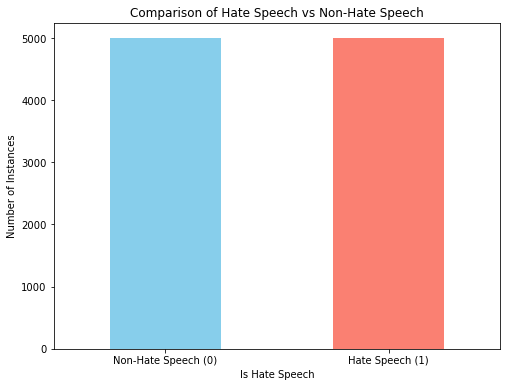

In [11]:

class_counts = df["IsHatespeech"].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Hate Speech vs Non-Hate Speech')
plt.xlabel('Is Hate Speech')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# DATA CLEANING

#### Lowercasing: Convert all text to lowercase or uppercase to ensure consistency in text comparison. Python’s .lower()

In [12]:
df['Text'] = df['Text'].str.lower()


C:\Users\shrey\AppData\Local\Temp\ipykernel_5792\1580990995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.lower()


#### Check that the text only contains text in english and remove any other  

In [13]:
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['Text'].apply(is_english)]

#### Remove URLs, mentions, and hashtags

In [14]:
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

df['Text'] = df['Text'].apply(remove_urls_mentions_hashtags)

#### Remove special characters and emojis

In [15]:

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Text'] = df['Text'].apply(remove_special_characters)

#### Expanding the contractions to better identify the meaning of words

In [16]:
import contractions

def expand_contractions(text):
    expanded_words = [contractions.fix(word) for word in text.split()]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df['Text'] = df['Text'].apply(expand_contractions)

#### Removing Punctuation and Numbers from the text

In [17]:
import string
def remove_noise(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['Text'] = df['Text'].apply(remove_noise)



#### Tokenization: Tokenize the text data into words or subword units (tokens). This step is often done during data preprocessing but is fundamental to feature engineering.

In [18]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df['Text'] = df['Text'].astype(str)

df['tokens'] = df['Text'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,IsHatespeech,tokens
0,frustratingly small please find an image at le...,0,"[frustratingly, small, please, find, an, image..."
1,padding cell padding class mainpagebg solid ve...,0,"[padding, cell, padding, class, mainpagebg, so..."
2,from the scenarios you present i see you belie...,0,"[from, the, scenarios, you, present, i, see, y..."
3,i have to go inside you tomorrow i hate myself...,0,"[i, have, to, go, inside, you, tomorrow, i, ha..."
4,retweet china s bird flu outbreak good signs b...,0,"[retweet, china, s, bird, flu, outbreak, good,..."


#### Remove Common Stopwords: Depending on your analysis, you may want to remove common stopwords (e.g., “the,” “and,” “is”) to focus on more meaningful content.

In [19]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization: Use lemmatization to reduce words to their base or dictionary form (e.g., “better” becomes “good”)

In [20]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Reassemble tokens into cleaned text

In [21]:

df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


#### Create a feature for text length

In [22]:

df['text_length'] = df['clean_text'].apply(len)



In [23]:
df.head(3)

,Text,IsHatespeech,tokens,clean_text,text_length
0,frustratingly small please find an image at le...,0,"[frustratingly, small, please, find, image, le...",frustratingly small please find image least pi...,117
1,padding cell padding class mainpagebg solid ve...,0,"[padding, cell, padding, class, mainpagebg, so...",padding cell padding class mainpagebg solid ve...,1192
2,from the scenarios you present i see you belie...,0,"[scenario, present, see, believe, people, robo...",scenario present see believe people robot abra...,560


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9310 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          9310 non-null   object
 1   IsHatespeech  9310 non-null   int64 
 2   tokens        9310 non-null   object
 3   clean_text    9310 non-null   object
 4   text_length   9310 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 436.4+ KB


# EDA

#### Text Length Analysis
Text Length Distribution: Calculate and plot the distribution of text lengths.

Compare Text Length: Compare the text length distribution between hate speech and non-hate speech.

In [26]:

print(df.shape)
print(df.dtypes)


(9310, 5)
Text            object
IsHatespeech     int64
tokens          object
clean_text      object
text_length      int64
dtype: object


#### Visualizing the Text Length distribution in our dataset

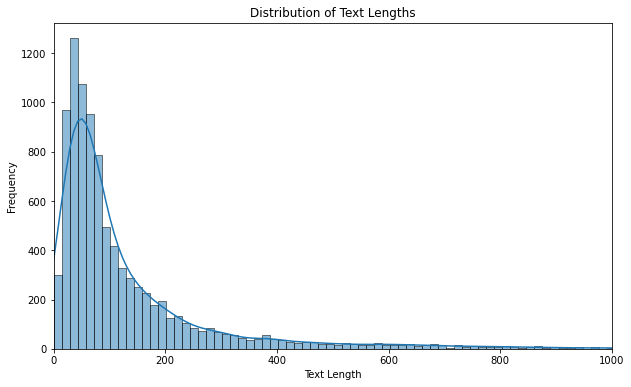

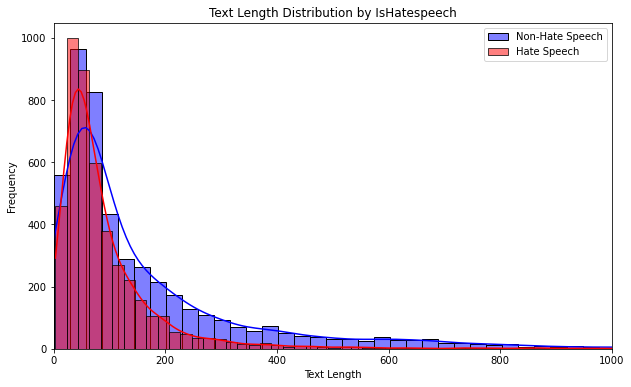

In [27]:
df['text_length'] = df['clean_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['IsHatespeech'] == 0]['text_length'], bins=50, color='blue', label='Non-Hate Speech', kde=True)
sns.histplot(df[df['IsHatespeech'] == 1]['text_length'], bins=50, color='red', label='Hate Speech', kde=True)
plt.title('Text Length Distribution by IsHatespeech')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 1000) 
plt.show()


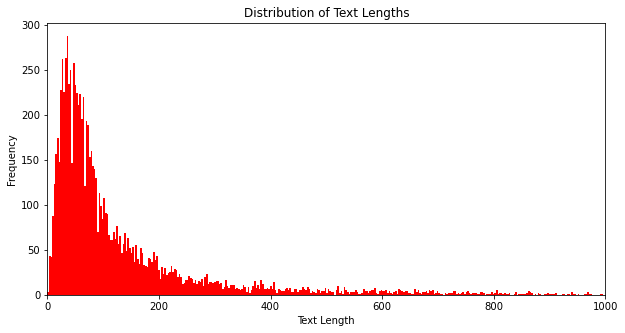

In [28]:

plt.figure(figsize=(10, 5))
df['text_length'].plot(kind='hist', bins=500, color='RED')
plt.title('Distribution of Text Lengths')
plt.xlim(0, 1000)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


### Word Frequency Analysis
#### Common Words: Identify and plot the most common words in the dataset.
#### Common Words by Class: Compare the most common words between hate speech and non-hate speech.

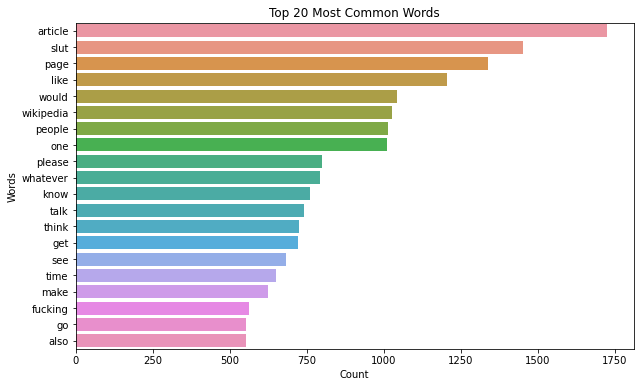

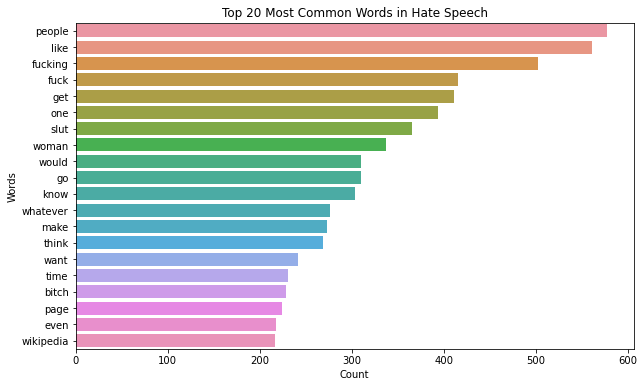

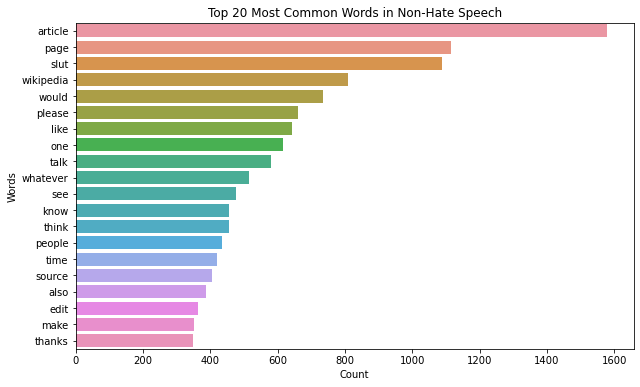

In [29]:

from collections import Counter

def word_frequencies(tokens):
    return Counter([word for token_list in tokens for word in token_list])


all_words = word_frequencies(df['tokens'])
common_words = all_words.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 1]['tokens'])
non_hate_speech_words = word_frequencies(df[df['IsHatespeech'] == 0]['tokens'])

common_hate_speech_words = hate_speech_words.most_common(20)
common_non_hate_speech_words = non_hate_speech_words.most_common(20)

hate_words, hate_counts = zip(*common_hate_speech_words)
non_hate_words, non_hate_counts = zip(*common_non_hate_speech_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(hate_counts), y=list(hate_words))
plt.title('Top 20 Most Common Words in Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(non_hate_counts), y=list(non_hate_words))
plt.title('Top 20 Most Common Words in Non-Hate Speech')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


### Word Tokenization
Word tokenization is the process of splitting a string of text into individual words or tokens. It is a fundamental step in natural language processing (NLP) and text mining tasks. By breaking down text into words, it allows for more detailed and granular analysis.

In [30]:
df['tokens'].head()

0    [frustratingly, small, please, find, image, le...
1    [padding, cell, padding, class, mainpagebg, so...
2    [scenario, present, see, believe, people, robo...
3    [go, inside, tomorrow, hate, every, time, feel...
4    [retweet, china, bird, flu, outbreak, good, si...
Name: tokens, dtype: object

#### The Dataset is mostly balanced and no need to perform any imbalanced data handling techniques on it.

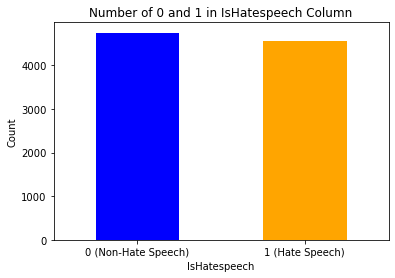

In [32]:
counts = df['IsHatespeech'].value_counts()
counts.plot(kind='bar', color=['blue', 'orange'])


plt.title('Number of 0 and 1 in IsHatespeech Column')
plt.xlabel('IsHatespeech')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (Non-Hate Speech)', '1 (Hate Speech)'], rotation=0)

plt.show()

In [33]:
df = df.dropna()

#### TF-IDF Embedding 
After testing various embedding techninques TF-IDF was the best fit for our dataset and its performance was also good with reaspect to other techniques. A temporary ML model was used to determine this performance of embedding techniques.

Here the max_features parameter is choosen as 2500 after trying with various other values this provided the best benchmark score

#### Split of Dataset into Train and Test
The datset was split into two parts the training dataset which is about 80% dataset and testing dataset which is about 20% both taken at random state.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_text']
y = df['IsHatespeech']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Dataset shape :",X_train.shape)
print("Test Dataset shape :",X_test.shape)

tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Training Dataset shape : (7448,)
Test Dataset shape : (1862,)


### Benchmark Using ML model

#### Support Vector Model
This model was used to set a standard benchmark score for the dataset. Here the model was Hypertunned and best fit parameters were tasted and the parameter which seemed best were used to train the model. We considered the Accuracy and F1 score to evaluate the performance of the model.

##### Performance Score:
Accuracy: 0.7830290010741139

F1 Score: 0.78848167539267




In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,confusion_matrix

svm_model = SVC(C=1, gamma='scale', kernel='rbf', random_state=42, probability=True)

svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_svm_proba = svm_model.predict_proba(X_test_tfidf)[:, 1]

print("SVM Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Precision:",precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

SVM Performance with TF-IDF:
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       934
           1       0.77      0.81      0.79       928

    accuracy                           0.78      1862
   macro avg       0.78      0.78      0.78      1862
weighted avg       0.78      0.78      0.78      1862

Accuracy: 0.7830290010741139
AUC-ROC: 0.856439327512368
Confusion Matrix:
 [[705 229]
 [175 753]]
F1 Score: 0.78848167539267
Precision: 0.7668024439918534
Recall: 0.8114224137931034


From this the benchmark for our deep learning model is set now we only have to achive better reasults than the benchmark score set by the ML model.

Here we have considered the Accuracy and F1 score for our benchmark score. Since our dataset is quite balanced the accuracy can also play a good role but we should also keep an eye for the precision and recall so we used the combined function of the F1 score which provide us with a combination of both precision and recall. 